In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 7\ Assignment/model_v5.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 7\ Assignment/utils_v5.py /content

In [ ]:
import model_v5
import utils_v5
from model_v5 import Net
from utils_v5 import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True


In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    #transforms.RandomAffine(degrees = 0, translate = (0.2, 0.2)), # apply shift
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1407,), (0.4081,)) --> This is incorrect line and hence commented
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
#test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms) --> Commented the incorrect line. train = False and test_transform needs to be passed
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 183618835.65it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 27418672.21it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 67269973.12it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5475863.40it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
type(train_data), len(train_data), len(train_data[0]), train_data.data.shape, test_data.data.shape

(torchvision.datasets.mnist.MNIST,
 60000,
 2,
 torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]))

In [ ]:
batch_size = 128

#kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True} --> Commented the incorrect line. shuffle parameter needs to be True
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

#test_loader = torch.utils.data.DataLoader(train_data, **kwargs) --> Commented the incorrect line. test_data needs be passed for test_loader
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

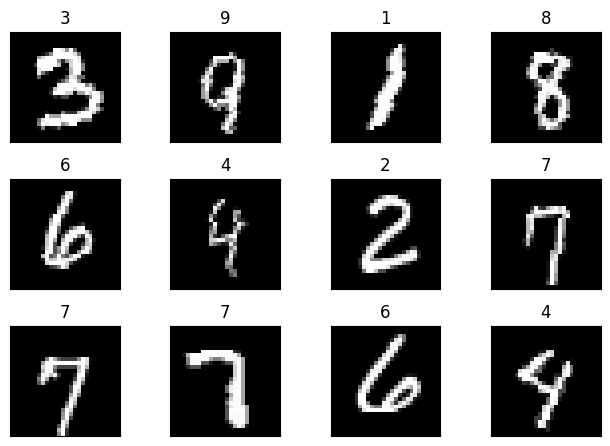

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
!pip install torchsummary
from torchsummary import summary

In [ ]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5            [-1, 8, 24, 24]             296
              ReLU-6            [-1, 8, 24, 24]               0
       BatchNorm2d-7            [-1, 8, 24, 24]              16
           Dropout-8            [-1, 8, 24, 24]               0
         MaxPool2d-9            [-1, 8, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              72
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 16,

In [ ]:
import torch.optim.lr_scheduler as lrs

In [ ]:
model = Net().to(device)

#optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9) -- Commented the line since learning rate needs to be corrected
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.01)

#scheduler = lrs.ReduceLROnPlateau(optimizer, 'min',patience = 3, verbose=True)
scheduler = lrs.ReduceLROnPlateau(optimizer, 'max',patience = 1, verbose=True)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)

# New Line
#criterion = nn.CrossEntropyLoss()
num_epochs = 20

In [ ]:
# train_losses, train_acc = train(model, device, train_loader, optimizer)

In [ ]:
# len(train_losses), len(train_acc), train_losses[0]

In [ ]:
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_losses, train_acc = train(model, device, train_loader, optimizer)

  #test(model, device, train_loader) --> Removed this incorrect line. test_loader needs to be passed here
  test_losses, test_acc = test(model, device, test_loader)

  scheduler.step(test_acc[epoch-1])
  my_lr = optimizer.param_groups[0]['lr']

  print(f'Test accuracy {test_acc[epoch-1]}')
  print(f'Learning Rate {my_lr}')

Epoch 1


Train: Loss=0.1318 Batch_id=468 Accuracy=92.43: 100%|██████████| 469/469 [00:36<00:00, 13.01it/s]


Test set: Average loss: 0.0466, Accuracy: 9866/10000 (98.66%)

Test accuracy 98.66
Learning Rate 0.1
Epoch 2


Train: Loss=0.0656 Batch_id=468 Accuracy=97.26: 100%|██████████| 469/469 [00:25<00:00, 18.30it/s]


Test set: Average loss: 0.0378, Accuracy: 9866/10000 (98.66%)

Test accuracy 98.66
Learning Rate 0.1
Epoch 3


Train: Loss=0.0390 Batch_id=468 Accuracy=97.63: 100%|██████████| 469/469 [00:25<00:00, 18.33it/s]


Test set: Average loss: 0.0339, Accuracy: 9892/10000 (98.92%)

Test accuracy 98.92
Learning Rate 0.1
Epoch 4


Train: Loss=0.1471 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:26<00:00, 17.62it/s]


Test set: Average loss: 0.0256, Accuracy: 9914/10000 (99.14%)

Test accuracy 99.14
Learning Rate 0.1
Epoch 5


Train: Loss=0.0279 Batch_id=468 Accuracy=97.93: 100%|██████████| 469/469 [00:31<00:00, 14.81it/s]


Test set: Average loss: 0.0290, Accuracy: 9905/10000 (99.05%)

Test accuracy 99.05
Learning Rate 0.1
Epoch 6


Train: Loss=0.0705 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:30<00:00, 15.49it/s]


Test set: Average loss: 0.0309, Accuracy: 9901/10000 (99.01%)

Epoch 00006: reducing learning rate of group 0 to 1.0000e-02.
Test accuracy 99.01
Learning Rate 0.010000000000000002
Epoch 7


Train: Loss=0.0145 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:25<00:00, 18.71it/s]


Test set: Average loss: 0.0229, Accuracy: 9927/10000 (99.27%)

Test accuracy 99.27
Learning Rate 0.010000000000000002
Epoch 8


Train: Loss=0.0098 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:25<00:00, 18.33it/s]


Test set: Average loss: 0.0219, Accuracy: 9934/10000 (99.34%)

Test accuracy 99.34
Learning Rate 0.010000000000000002
Epoch 9


Train: Loss=0.0120 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:24<00:00, 18.79it/s]


Test set: Average loss: 0.0221, Accuracy: 9931/10000 (99.31%)

Test accuracy 99.31
Learning Rate 0.010000000000000002
Epoch 10


Train: Loss=0.0123 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:25<00:00, 18.57it/s]


Test set: Average loss: 0.0206, Accuracy: 9939/10000 (99.39%)

Test accuracy 99.39
Learning Rate 0.010000000000000002
Epoch 11


Train: Loss=0.0094 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:25<00:00, 18.48it/s]


Test set: Average loss: 0.0204, Accuracy: 9938/10000 (99.38%)

Test accuracy 99.38
Learning Rate 0.010000000000000002
Epoch 12


Train: Loss=0.0233 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:25<00:00, 18.50it/s]


Test set: Average loss: 0.0201, Accuracy: 9941/10000 (99.41%)

Test accuracy 99.41
Learning Rate 0.010000000000000002
Epoch 13


Train: Loss=0.0313 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:25<00:00, 18.67it/s]


Test set: Average loss: 0.0201, Accuracy: 9938/10000 (99.38%)

Test accuracy 99.38
Learning Rate 0.010000000000000002
Epoch 14


Train: Loss=0.0066 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:25<00:00, 18.18it/s]


Test set: Average loss: 0.0196, Accuracy: 9940/10000 (99.40%)

Epoch 00014: reducing learning rate of group 0 to 1.0000e-03.
Test accuracy 99.4
Learning Rate 0.0010000000000000002
Epoch 15


Train: Loss=0.0827 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:25<00:00, 18.46it/s]


Test set: Average loss: 0.0206, Accuracy: 9940/10000 (99.40%)

Test accuracy 99.4
Learning Rate 0.0010000000000000002
Epoch 16


Train: Loss=0.0360 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:25<00:00, 18.42it/s]


Test set: Average loss: 0.0196, Accuracy: 9942/10000 (99.42%)

Test accuracy 99.42
Learning Rate 0.0010000000000000002
Epoch 17


Train: Loss=0.0405 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:25<00:00, 18.62it/s]


Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

Test accuracy 99.39
Learning Rate 0.0010000000000000002
Epoch 18


Train: Loss=0.0322 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:25<00:00, 18.62it/s]


Test set: Average loss: 0.0196, Accuracy: 9940/10000 (99.40%)

Epoch 00018: reducing learning rate of group 0 to 1.0000e-04.
Test accuracy 99.4
Learning Rate 0.00010000000000000003
Epoch 19


Train: Loss=0.0850 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:25<00:00, 18.41it/s]


Test set: Average loss: 0.0199, Accuracy: 9941/10000 (99.41%)

Test accuracy 99.41
Learning Rate 0.00010000000000000003
Epoch 20


Train: Loss=0.0081 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:25<00:00, 18.60it/s]


Test set: Average loss: 0.0198, Accuracy: 9941/10000 (99.41%)

Epoch 00020: reducing learning rate of group 0 to 1.0000e-05.
Test accuracy 99.41
Learning Rate 1.0000000000000004e-05


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Test Accuracy')

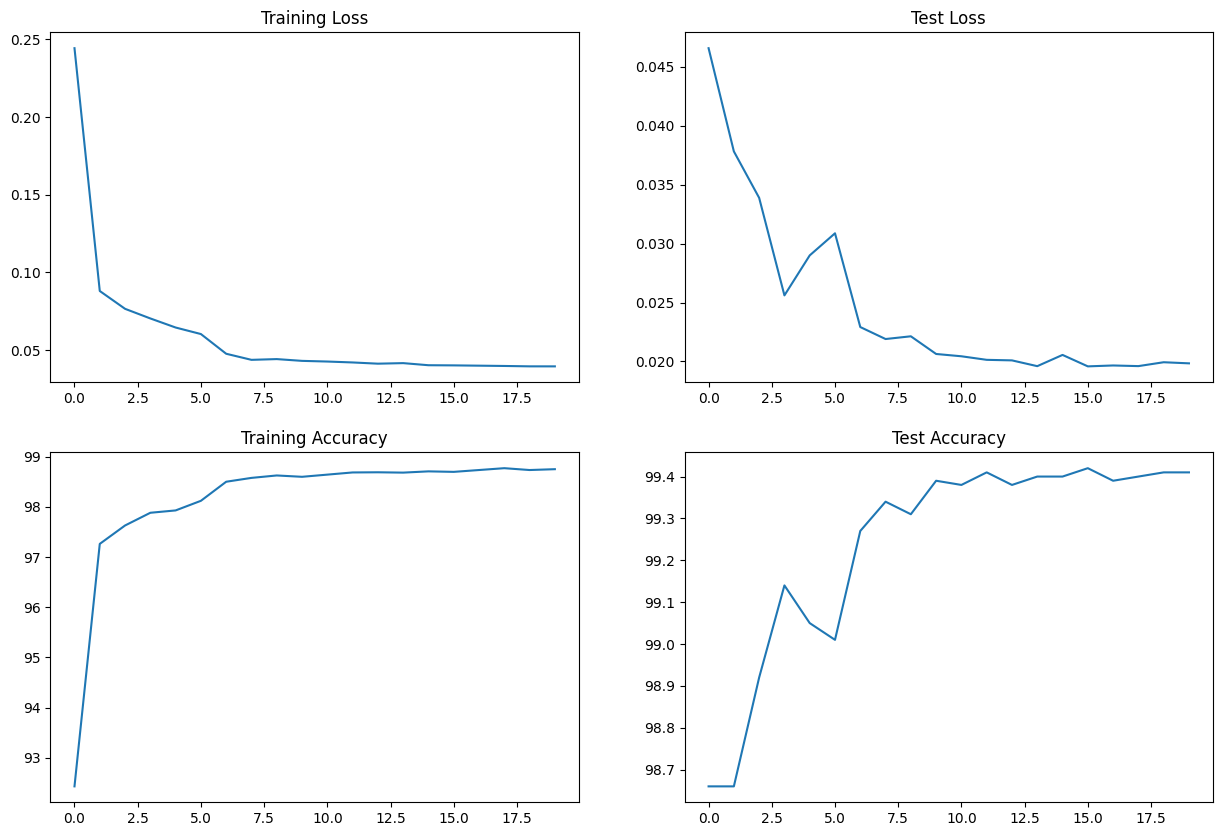

In [ ]:
printTrainTest_LossAcc(train_losses,train_acc,test_losses,test_acc)